In [85]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [94]:
file = "./Database/games-release-ALL.csv"

steam_df = pd.read_csv(file)

In [30]:
""" 
Ajustando o dataframe aleátorio selecionado para trabalhar na primeira parte do curso
  
deletando atributos que não serão usados,
modificando os nomes,
alterando tipo dos atributos.   
"""

' \nAjustando o dataframe aleátorio selecionado para trabalhar na primeira parte do curso\n  \ndeletando atributos que não serão usados,\nmodificando os nomes,\nalterando tipo dos atributos.   \n'

In [95]:
del steam_df["Unnamed: 0"]
del steam_df["link"]

In [96]:
steam_df = steam_df.rename(columns={"game":"Jogo","release":"Lancamento","positive_reviews":"Comentarios Pos", "negative_reviews":"Comentarios Neg",
                         "total_reviews":"Total Comentarios","rating":"Avaliacao","peak_players":"Pico Jogadores"})

In [97]:
steam_df["Lancamento"] = pd.to_datetime(steam_df["Lancamento"])


In [98]:
"""Conversão Int"""
steam_df["Pico Jogadores"] = pd.to_numeric(steam_df["Pico Jogadores"].str.replace(",",""))
steam_df["Comentarios Pos"] = pd.to_numeric(steam_df["Comentarios Pos"].str.replace(",",""))
steam_df["Comentarios Neg"] = pd.to_numeric(steam_df["Comentarios Neg"].str.replace(",",""))

In [104]:
steam_df["Total Comentarios"] = steam_df["Comentarios Neg"] + steam_df["Comentarios Pos"]
steam_df["Avaliacao"] = pd.to_numeric(steam_df["Avaliacao"].str.replace("%",""))

In [106]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Jogo               66427 non-null  object        
 1   Lancamento         66427 non-null  datetime64[ns]
 2   Pico Jogadores     66427 non-null  int64         
 3   Comentarios Pos    66427 non-null  int64         
 4   Comentarios Neg    66427 non-null  int64         
 5   Total Comentarios  66427 non-null  int64         
 6   Avaliacao          66427 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.5+ MB


In [105]:
steam_df

,Jogo,Lancamento,Pico Jogadores,Comentarios Pos,Comentarios Neg,Total Comentarios,Avaliacao
0,Pizza Tower,2023-01-26,4529,19807,227,20034,96.39
1,Resident Evil 4,2023-03-24,168191,61752,1616,63368,95.75
2,The Murder of Sonic the Hedgehog,2023-03-31,15543,12643,213,12856,95.54
3,Pineapple on pizza,2023-03-28,1415,11717,209,11926,95.39
4,Hi-Fi RUSH,2023-01-25,6132,14152,324,14476,95.09
...,...,...,...,...,...,...,...
66422,Space Empires V,2006-10-16,137,290,120,410,67.34
66423,Iron Warriors: T-72 Tank Command,2006-07-26,15,173,104,277,60.17
66424,Gumboy: Crazy Adventures,2006-12-19,22,61,60,121,50.32
66425,Shattered Union,2006-10-25,13,71,70,141,50.27


In [110]:
"""Serie do pandas"""
s = pd.Series([1,2,np.nan,6,8])
s

0    1.0
1    2.0
2    NaN
3    6.0
4    8.0
dtype: float64

In [112]:
"Linha com datas"
dates = pd.date_range("20230505",periods=10)
dates

DatetimeIndex(['2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14'],
              dtype='datetime64[ns]', freq='D')

In [118]:
"""Dataframe com indices iguais as datas, e colunas uma lista"""
df = pd.DataFrame(np.random.randn(10,5), index = dates, columns=list("ABCDE"))
df

,A,B,C,D,E
2023-05-05,-0.076408,-0.273975,-1.055135,0.515691,-0.635535
2023-05-06,1.035673,-1.070333,0.861585,0.681863,-0.650598
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086
2023-05-08,-1.139389,-1.184244,0.715286,0.243409,-0.703952
2023-05-09,0.371461,0.181529,1.093388,-0.883888,-1.435072
2023-05-10,-0.741592,0.407326,-0.547406,0.670166,-0.508690
2023-05-11,1.755387,0.206153,-0.629572,1.024830,-1.233099
2023-05-12,-0.616153,-0.720910,1.112835,0.459094,0.726509
2023-05-13,-0.322866,-0.034756,-0.690387,0.617925,-1.455234
2023-05-14,-0.040571,-0.613701,-1.579049,-0.863429,-0.471005


In [131]:
dicionario = {"A":("Ana","Anabelle","Any"),
              "B":("Beatriz","Bia","Bruna"),
              "C":("Camila","Camy","Cecilia"),
              "D":("Daiane","Diana","Dalila"),
              "E":("Esmeralda","Emily","Evelyn")}
df2 = pd.DataFrame(dicionario)
df2


,A,B,C,D,E
0,Ana,Beatriz,Camila,Daiane,Esmeralda
1,Anabelle,Bia,Camy,Diana,Emily
2,Any,Bruna,Cecilia,Dalila,Evelyn


In [142]:
df3 = pd.DataFrame(
    {
        "Nota": 10,
        "Data":pd.to_datetime("20230505"),
        "Porcao": pd.Series(1, index = list(range(4)),dtype = float),
        "Categoria": pd.Categorical(["Café","Almoço","Jantar","Café"]),
        "Marca": "Cafetex"
    }
)
df3

,Nota,Data,Porcao,Categoria,Marca
0,10,2023-05-05,1.0,Café,Cafetex
1,10,2023-05-05,1.0,Almoço,Cafetex
2,10,2023-05-05,1.0,Jantar,Cafetex
3,10,2023-05-05,1.0,Café,Cafetex


In [140]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Nota       4 non-null      int64         
 1   Data       4 non-null      datetime64[ns]
 2   Porcao     4 non-null      float64       
 3   Categoria  4 non-null      category      
 4   Marca      4 non-null      object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


In [147]:
print(f"Indexs: {df3.index}")
print(f"Colunas: {df3.columns}")

Indexs: Index([0, 1, 2, 3], dtype='int64')
Colunas: Index(['Nota', 'Data', 'Porcao', 'Categoria', 'Marca'], dtype='object')


In [148]:
"""AO USAR TO_NUMPY() NAO APARECEM OS ROTULOS DE COLUNAS OU INDEX"""
df.to_numpy()

array([[-0.07640804, -0.27397507, -1.05513492,  0.51569101, -0.63553485],
       [ 1.03567294, -1.07033331,  0.86158535,  0.68186318, -0.65059757],
       [ 0.78073081,  1.30542116,  0.78499583, -1.37129437, -0.06708563],
       [-1.13938893, -1.18424438,  0.71528597,  0.24340931, -0.70395187],
       [ 0.37146112,  0.1815285 ,  1.09338843, -0.88388803, -1.43507169],
       [-0.74159245,  0.40732608, -0.5474061 ,  0.67016564, -0.50868972],
       [ 1.75538722,  0.20615307, -0.62957171,  1.02483037, -1.23309944],
       [-0.61615323, -0.72091019,  1.11283475,  0.45909401,  0.7265085 ],
       [-0.32286552, -0.03475617, -0.69038717,  0.61792469, -1.45523419],
       [-0.04057096, -0.61370121, -1.57904905, -0.86342892, -0.47100547]])

In [150]:
print(df2.to_numpy)

<bound method DataFrame.to_numpy of           A        B        C       D          E
0       Ana  Beatriz   Camila  Daiane  Esmeralda
1  Anabelle      Bia     Camy   Diana      Emily
2       Any    Bruna  Cecilia  Dalila     Evelyn>


In [151]:
df3.to_numpy()

array([[10, Timestamp('2023-05-05 00:00:00'), 1.0, 'Café', 'Cafetex'],
       [10, Timestamp('2023-05-05 00:00:00'), 1.0, 'Almoço', 'Cafetex'],
       [10, Timestamp('2023-05-05 00:00:00'), 1.0, 'Jantar', 'Cafetex'],
       [10, Timestamp('2023-05-05 00:00:00'), 1.0, 'Café', 'Cafetex']],
      dtype=object)

In [152]:
"""Descrever principais informações do dataframe"""
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.100627,-0.179749,0.006654,0.109437,-0.643376
std,0.890681,0.755943,1.004600,0.827954,0.657774
min,-1.139389,-1.184244,-1.579049,-1.371294,-1.455234
25%,-0.542831,-0.694108,-0.675183,-0.586719,-1.100813
50%,-0.058490,-0.154366,0.083940,0.487393,-0.643066
75%,0.678413,0.199997,0.842438,0.657105,-0.480427
max,1.755387,1.305421,1.112835,1.024830,0.726509


In [153]:
df

,A,B,C,D,E
2023-05-05,-0.076408,-0.273975,-1.055135,0.515691,-0.635535
2023-05-06,1.035673,-1.070333,0.861585,0.681863,-0.650598
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086
2023-05-08,-1.139389,-1.184244,0.715286,0.243409,-0.703952
2023-05-09,0.371461,0.181529,1.093388,-0.883888,-1.435072
2023-05-10,-0.741592,0.407326,-0.547406,0.670166,-0.508690
2023-05-11,1.755387,0.206153,-0.629572,1.024830,-1.233099
2023-05-12,-0.616153,-0.720910,1.112835,0.459094,0.726509
2023-05-13,-0.322866,-0.034756,-0.690387,0.617925,-1.455234
2023-05-14,-0.040571,-0.613701,-1.579049,-0.863429,-0.471005


In [174]:
df.sort_index(ascending= False) 

,A,B,C,D,E
2023-05-14,-0.040571,-0.613701,-1.579049,-0.863429,-0.471005
2023-05-13,-0.322866,-0.034756,-0.690387,0.617925,-1.455234
2023-05-12,-0.616153,-0.720910,1.112835,0.459094,0.726509
2023-05-11,1.755387,0.206153,-0.629572,1.024830,-1.233099
2023-05-10,-0.741592,0.407326,-0.547406,0.670166,-0.508690
2023-05-09,0.371461,0.181529,1.093388,-0.883888,-1.435072
2023-05-08,-1.139389,-1.184244,0.715286,0.243409,-0.703952
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086
2023-05-06,1.035673,-1.070333,0.861585,0.681863,-0.650598
2023-05-05,-0.076408,-0.273975,-1.055135,0.515691,-0.635535


In [177]:
"""Representando a coluna A do maior pro menor"""
df.sort_values("A", ascending=False)

,A,B,C,D,E
2023-05-11,1.755387,0.206153,-0.629572,1.024830,-1.233099
2023-05-06,1.035673,-1.070333,0.861585,0.681863,-0.650598
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086
2023-05-09,0.371461,0.181529,1.093388,-0.883888,-1.435072
2023-05-14,-0.040571,-0.613701,-1.579049,-0.863429,-0.471005
2023-05-05,-0.076408,-0.273975,-1.055135,0.515691,-0.635535
2023-05-13,-0.322866,-0.034756,-0.690387,0.617925,-1.455234
2023-05-12,-0.616153,-0.720910,1.112835,0.459094,0.726509
2023-05-10,-0.741592,0.407326,-0.547406,0.670166,-0.508690
2023-05-08,-1.139389,-1.184244,0.715286,0.243409,-0.703952


In [189]:
"""Recebendo valores"""
"""REPRESENTA UMA SERIES DO PANDAS"""

df["A"]

2023-05-05   -0.076408
2023-05-06    1.035673
2023-05-07    0.780731
2023-05-08   -1.139389
2023-05-09    0.371461
2023-05-10   -0.741592
2023-05-11    1.755387
2023-05-12   -0.616153
2023-05-13   -0.322866
2023-05-14   -0.040571
Freq: D, Name: A, dtype: float64

In [186]:
""" Fatiando o dataframe, parecido com lista no python"""
"""também funciona por chave"""

display(df[2:5])

df["2023-05-07":"2023-05-09"]

,A,B,C,D,E
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086
2023-05-08,-1.139389,-1.184244,0.715286,0.243409,-0.703952
2023-05-09,0.371461,0.181529,1.093388,-0.883888,-1.435072


,A,B,C,D,E
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086
2023-05-08,-1.139389,-1.184244,0.715286,0.243409,-0.703952
2023-05-09,0.371461,0.181529,1.093388,-0.883888,-1.435072


In [196]:
df.loc[dates[0]]

A   -0.076408
B   -0.273975
C   -1.055135
D    0.515691
E   -0.635535
Name: 2023-05-05 00:00:00, dtype: float64

In [201]:
df.loc[:,["A","B"]]

,A,B
2023-05-05,-0.076408,-0.273975
2023-05-06,1.035673,-1.070333
2023-05-07,0.780731,1.305421
2023-05-08,-1.139389,-1.184244
2023-05-09,0.371461,0.181529
2023-05-10,-0.741592,0.407326
2023-05-11,1.755387,0.206153
2023-05-12,-0.616153,-0.720910
2023-05-13,-0.322866,-0.034756
2023-05-14,-0.040571,-0.613701


In [202]:
df[0:2].loc[:,["A","B"]] 

,A,B
2023-05-05,-0.076408,-0.273975
2023-05-06,1.035673,-1.070333


In [203]:
""" FUNCAO LOC ACEITA STRING"""
df.loc["2023-05-05":"2023-05-08",["C","D"]]

,C,D
2023-05-05,-1.055135,0.515691
2023-05-06,0.861585,0.681863
2023-05-07,0.784996,-1.371294
2023-05-08,0.715286,0.243409


In [204]:
df.loc["2023-05-05",["C","D"]]

C   -1.055135
D    0.515691
Name: 2023-05-05 00:00:00, dtype: float64

In [205]:
""" RETORNAR POR POSICAO USAMOS O ILOC"""
df.iloc[0:5,0:2]

,A,B
2023-05-05,-0.076408,-0.273975
2023-05-06,1.035673,-1.070333
2023-05-07,0.780731,1.305421
2023-05-08,-1.139389,-1.184244
2023-05-09,0.371461,0.181529


In [206]:
df.iloc[[1,2,4],[1,4]]

,B,E
2023-05-06,-1.070333,-0.650598
2023-05-07,1.305421,-0.067086
2023-05-09,0.181529,-1.435072


In [207]:
df.iloc[0:3,:]

,A,B,C,D,E
2023-05-05,-0.076408,-0.273975,-1.055135,0.515691,-0.635535
2023-05-06,1.035673,-1.070333,0.861585,0.681863,-0.650598
2023-05-07,0.780731,1.305421,0.784996,-1.371294,-0.067086


<Axes: xlabel='A', ylabel='B'>

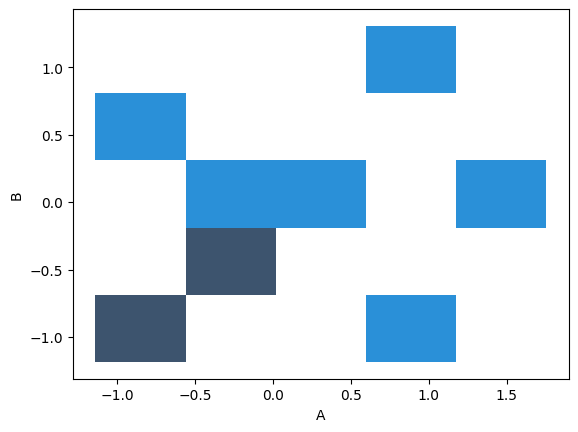

In [209]:
sns.histplot(df, x = "A",y="B")
